MongoDB查询出的结果使用列表字典存取

In [1]:

from pymongo import MongoClient
import pandas as pd


In [2]:
# 连接本地数据
localClient = MongoClient("mongodb://localhost:27017")
localDB = localClient['star_arena'] # 具体的数据库
localCollection = localDB.star_arena_thread # 指定集合，类似MySQL中的表

In [3]:
res = localCollection.find()

# 将res存储进pandas的dataframe
SA_df = pd.DataFrame(list(res))
SA_df.head()

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
0,653c7d8746842c8707a6adee,0,00a1d872-9f81-486f-a522-6b4c59c8f228,,repost,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-10-05T17:51:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],"{'displayStatus': 0, 'id': 'cd9e022a-971a-453b..."
1,653c7d8746842c8707a6adef,0,5f147c10-d2be-4204-bb84-4b1f098355b7,,repost,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-29T00:04:39.398Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],"{'displayStatus': 0, 'id': 'cf90a5db-e709-47ed..."
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi 👀,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


对文本简单分析

In [4]:
# 展示threadType的种类
SA_df['threadType'].value_counts()

repost    1043264
text       240641
image      124894
Name: threadType, dtype: int64

In [25]:
# 绘制threadType为repost 的 content 不为空的记录
SA_df[(SA_df['threadType'] == 'repost') & (SA_df['content'] != "")].head()

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost


<AxesSubplot:>

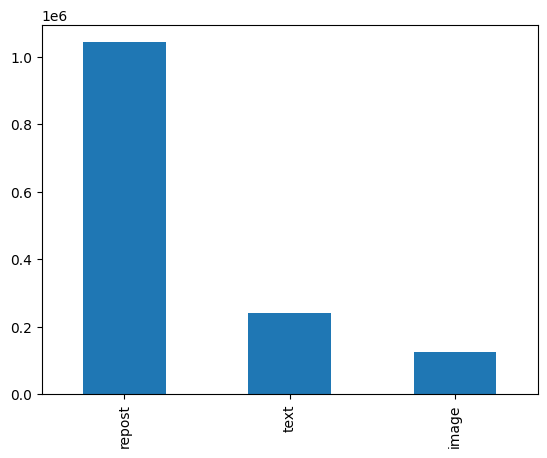

In [18]:
# 绘制各种类型地帖子的数量
SA_df['threadType'].value_counts().plot(kind='bar')

count    1.408799e+06
mean     4.897251e+01
std      2.757883e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      1.447925e+06
Name: content, dtype: float64


<AxesSubplot:>

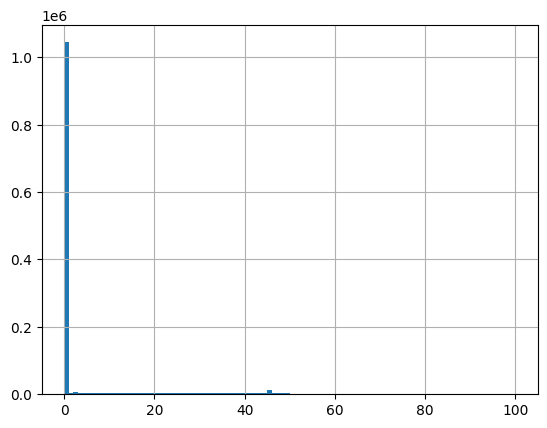

In [24]:
# 绘制帖子长度地分布（输出中位数与平均数）
print(SA_df["content"].str.len().describe())

# 绘制帖子长度地分布（直方图）（控制x最大值为100）
SA_df["content"].str.len().hist(bins=100, range=(0,100))

## LDA for stars arena

In [5]:
# 准备数据
SA_LDA_df = SA_df[SA_df['threadType'] != "repost"]
SA_LDA_df

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi 👀,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early ⭐️⭐️⭐️⭐️,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)<br/>Love it 🔺,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408738,653e1e0658753aed78b561fe,0,62f200fb-df10-40dc-bfda-35c74a2d7ef3,Follow me for follow back 🔙 famz 💯,text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T14:04:45.661Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
1408739,653e1e0658753aed78b561ff,0,09e9f0e7-4754-4ea2-9fe4-1b77a7bda60a,I need to follow more legends ⭐✨.<br/><br/>Sho...,image,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T13:49:53.277Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 64058, 'url': 'https://static.starshar...",NaN
1408740,653e1e0658753aed78b56200,0,6c752a3d-5c09-41c6-a20e-24be07ca06ae,They said no pain no gain.🤔🤔🤔<br/>I don chop p...,text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T13:46:34.447Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
1408759,653e1e0658753aed78b56213,0,992b554a-3b65-4d1e-b543-c285da6e45b5,"It's a new day full of blessings, focus on the...",text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T06:34:01.015Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


count    3.655350e+05
mean     1.668834e+02
std      4.885644e+03
min      0.000000e+00
25%      2.700000e+01
50%      5.400000e+01
75%      1.030000e+02
max      1.403120e+06
Name: content, dtype: float64


<AxesSubplot:>

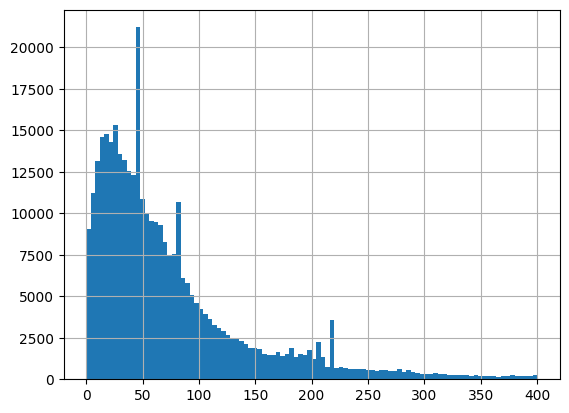

In [29]:
# 绘制SA_LDA_df中content长度的分布
print(SA_LDA_df["content"].str.len().describe())
SA_LDA_df["content"].str.len().hist(bins=100, range=(0,400))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
import string as st
import re
import emoji

In [8]:
# 停用词表
with open("./LDA/stop_words.txt", "r", encoding="utf-8") as f:
    string = f.read()
stop_words = string.split("\n")

In [9]:
# emoji demojize
SA_LDA_df['content'] = SA_LDA_df['content'].apply(emoji.demojize)
SA_LDA_df.head()

C:\Users\86139\AppData\Local\Temp\ipykernel_27628\3066843352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_LDA_df['content'] = SA_LDA_df['content'].apply(emoji.demojize)


,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi :eyes:,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early :star::star::star::star:,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)<br/>Love it :red_t...,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


In [31]:
# remove html tag
def remove_html_tag(text):
    html_tag = re.compile("<.*?>")
    return re.sub(html_tag, "", text)

print(remove_html_tag("<html lang='zh'>11</html>"))

SA_LDA_df["content"] = SA_LDA_df["content"].apply(remove_html_tag)
SA_LDA_df.head()

11


C:\Users\86139\AppData\Local\Temp\ipykernel_27628\2111443664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_LDA_df["content"] = SA_LDA_df["content"].apply(remove_html_tag)


,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost,content.Seg
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,plans weekend bored
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi :eyes:,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,future socialfi
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early :star::star::star::star:,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)Love it :red_triang...,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,Finally action red_triangle_pointed_up


In [12]:
stop_words = set(stop_words)

# 分词+去停用词函数
def text_segmentation(text):
    
    # 实现功能"So early :star::star::star::star:-> So early"
    pattern = r":([^:]+):"
    text = re.sub(pattern, "", text)
    
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
        
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", st.punctuation))
    
    return " ".join(tokens)



SA_LDA_df["content.Seg"] = SA_LDA_df["content"].apply(text_segmentation)

C:\Users\86139\AppData\Local\Temp\ipykernel_27628\889150412.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_LDA_df["content.Seg"] = SA_LDA_df["content"].apply(text_segmentation)


In [13]:
# 向量化
n_feature = 1000 # 1000个特征
vectorizer = CountVectorizer(strip_accents="unicode",
                             max_features=n_feature,
                             stop_words='english',
                             max_df=0.5,
                             min_df=10)

X = vectorizer.fit_transform(SA_LDA_df["content.Seg"])

In [34]:
# LDA
plexs = []
scores = []
for i in range(2,21):
    lda_ex = LatentDirichletAllocation(n_components=i, 
                                max_iter=50, 
                                learning_method='online',
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                                random_state=0)
    
    lda_ex.fit(X)
    plexs.append(lda_ex.perplexity(X))
    scores.append(lda_ex.score(X))

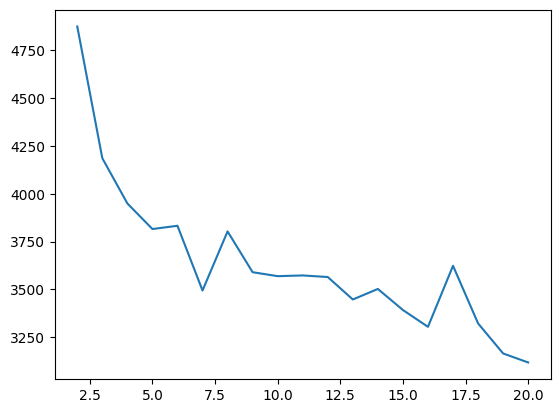

In [35]:
import matplotlib.pyplot as plt

x = list(range(2,21)) # n=7
plt.plot(x, plexs)
plt.show()

In [14]:
# 可视化
import pyLDAvis.sklearn as sklearnvis
import pyLDAvis

# 训练LDA模型
lda = LatentDirichletAllocation(
    n_components=7,
    max_iter=50,
    learning_method="online",
    doc_topic_prior=0.1,
    topic_word_prior=0.01,
    random_state=0,
)
lda.fit(X)
pyLDAvis.enable_notebook()
vis_data = sklearnvis.prepare(lda, X, vectorizer)

d:\anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
vis_data
# 保存vis_data为html文件
pyLDAvis.save_html(vis_data, "stars_arena.html")

In [16]:
# 输出主题下的关键词，根据主题词判定分类
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i] for i in topic.argsort()[: -10 - 1 : -1]]))

Topic 1:
ferdy follow love starsarenacom airdrop 100 morning actual rt counting
Topic 2:
trades tickets market bullish comment tw low money btc trading
Topic 3:
buy gm shares bought day guys sold buying fucking purchased
Topic 4:
send ticket price gt max sells holders thread tvl visible
Topic 5:
avax app share key deposit repost 10 real tips avalanche
Topic 6:
twitter com https post starsarena followers crypto purchase support platform
Topic 7:
arena stars time people bridge minute fuck wo bitcoin active
